# Exploratory Data Analysis Churn Analysis


###### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [ ]:
#import library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Pandas show all column
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
df=pd.read_csv('dataset.csv')

# **Data Understanding**

Data understanding adalah tahap awal dalam proses pengolahan data yang bertujuan untuk memahami dan mengumpulkan informasi tentang data yang akan digunakan. Pada tahap ini, data dianalisis dan dipelajari untuk memahami karakteristik, kualitas, dan struktur datanya. Tujuan dari Data Understanding adalah untuk memastikan kualitas data yang digunakan dalam analisis dan memastikan bahwa data sesuai dengan tujuan dan kebutuhan bisnis.

In [ ]:
#melihat 5 data teratas pada dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#melihat dimensi dari dataframe
df.shape

(7043, 21)

In [ ]:
#memunculkan kolom pada dataframe
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
#mencari informasi terkait dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#mengubah tipe data variabel SeniorCitizen menjadi object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [ ]:
#mengubah tipe data variabel TotalCharges menjadi float64
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

In [ ]:
#cek apakah tipe datanya sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#melakukan cek apakah terdapat missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#missing value handling
df[df['TotalCharges'].isna()]
#drop rows with missing value
df=df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#mengeluarkan kolom yang tidak digunakan (irrelevant)
df=df.drop(columns=['customerID'])

Yang perlu diperhatikan:
- Apakah ada data dengan tipe yang kurang sesuai? Misal, Name dengan tipe int64
- Apakah ada data yang hilang? Cari kolom dengan count < jumlah row

Summary:
1. Ada beberapa data dengan tipe data yang kurang sesuai yaitu:
   - SeniorCitizen seharusnya bertipe data kategori (object)
   - TotalCharges seharusnya bertipe data float64
2. Setelah variabel TotalCharges diubah tipe datanya menjadi float64, ternyata terdapat missing value pada variabel tersebut sebanyak 11 baris sehingga dilakukan handling dengan menghapus baris yang memiliki nilai missing value.
3. Karena variabel CustomerID tidak relevant, maka variabel tersebut akan dikeluarkan.

## **Statistical Summary**

Statistical Summary digunakan untuk menggambarkan dan merangkum data secara statistik. Statistical Summary umumnya mencakup penghitungan nilai rata-rata, median, dan modus dari data. Selain itu, Statistical Summary juga dapat mencakup penghitungan variansi, simpangan baku, rentang, kuartil, dan persentil. Hal ini dapat membantu dalam mengidentifikasi data yang tidak bias, menemukan pola dalam data, dan membandingkan kelompok data yang berbeda.


In [ ]:
#memisahkan kolom kategori dan numerik untuk memudahkan proses analisis
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in ['Churn']]
nums=[i for i in df.columns if df[i].dtypes != 'object']

Selanjutnya kita munculkan ringkasan statistik dataframe

### Pendekatan numerik

In [ ]:
#mencari statistical summary pada data numerik
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah nilai maksimal/minimal masih berada di batas wajar? Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median? Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

**Summary:**
1. Nilai yang tertera pada setiap kolom masuk akal
2. Pada variabel TotalCharges nilai minimum dan maksimum sudah diluar batas wajar karena nilainya terlalu jauh dari mean/median.
3. Ada, pada kolom TotalCharges mean dan mediannya terpaut jauh yaitu sekitar 886

### Pendekatan kategorik

In [ ]:
#mencari unique value dan jumlahnya dari setiap variabel pada cats
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom gender:
Male      3549
Female    3483
Name: gender, dtype: int64

Value count kolom SeniorCitizen:
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Value count kolom Partner:
No     3639
Yes    3393
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2099
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6352
No      680
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: 

In [ ]:
#mencari nilai unique dan top frekuensinya pada data kategori
df[cats].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Yang perlu diperhatikan:
- Apakah jumlah unique values masuk akal?
- Apakah frekuensi dari nilai yang paling umum terlalu timpang? Apabila distribusi nilai terlalu timpang, feature tidak akan terlalu berguna dalam klasifikasi

Summary:
1. Jumlah unique values masuk akal, karena jumlahnya tidak ada yang terlalu banyak.
2. Ada beberapa variabel yang distribusi nilainya terlalu timpang, yaitu: SeniorCitizen, Dependents, PhoneService, dan Contract.

## **Univariate Analysis**
Univariate Analysis adalah analisis statistik yang dilakukan pada satu variabel atau satu set data tunggal. Dalam analisis ini, variabel tunggal dianalisis untuk memahami distribusi, pola, dan karakteristik data. 

Contoh dari analisis univariat adalah pembuatan grafik seperti histogram, diagram garis, dan diagram lingkaran untuk memvisualisasikan data. Analisis univariat juga dapat dilakukan untuk memahami keterkaitan antara variabel dengan menggunakan uji hipotesis seperti uji t atau uji ANOVA.

### Boxplot 

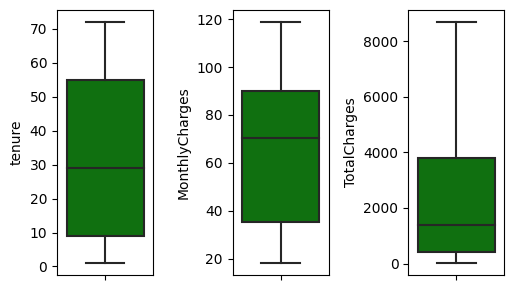

In [ ]:
#Boxplot untuk variabel numerik
plt.figure(figsize=(7,3))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Berdasarkan boxplot di atas, pada variabel tenure terlihat bahwa lama pelanggan telah bersama perusahaan pada akhir kuartal ini berada di antara 10-55 bulan, dengan rata-rata sekitar 30 bulan.

Pada variabel MonthlyCharges terlihat bahwa total biaya bulanan pelanggan saat ini untuk semua layanan mereka dari perusahaan berada di sekitar 38-90 dollar dan rata-ratanya yaitu sebesar 72 dollar.

Pada variabel TotalCharges terlihat bahwa total tagihan pelanggan selama kuartal ini adalah 300-3900 dollar dan rata-ratanya sebesar 1700 dollar.

In [ ]:
#membuat dataframe baru yang berisi semua variabel dengan tipe data numerik
df_nums = df[['tenure', 'MonthlyCharges','TotalCharges']]
df_nums

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
#cek nilai outliner semua variabel pada dataframe df_nums
def find_outlier(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)
    
    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)
    
    return outlier

def show_outlier(data, variables):
    return pd.DataFrame({
        "outliers": [len(j) for j in [find_outlier(data[i]) for i in variables]],
        "percentage": np.array([len(j) for j in [find_outlier(data[i]) for i in variables]]) / len(data) * 100
    }).set_index([variables]).sort_values("outliers", ascending=False)

show_outlier(df_nums, df_nums.columns)

,outliers,percentage
tenure,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0


Yang perlu diperhatikan:
- Berapa banyak dan berapa jauh outlier di setiap kolom? Definisi umum outlier: berjarak 1.5x IQR dari Q1/Q3
- Bagaimana Distribusi Datanya ?

Summary:
1. Berdasarkan output terlihat bahwa pada semua variabel tidak terdapat outlier
2. Distribusi data pada variabel tenure, MonthlyCharges dan TotalCharges tidak berdistribusi normal atau tidak simetris. Terlihat dari bagian whisker atas yang lebih panjang sehingga terindikasi bahwa data cenderung miring ke kanan (right skewed).

### Histplot

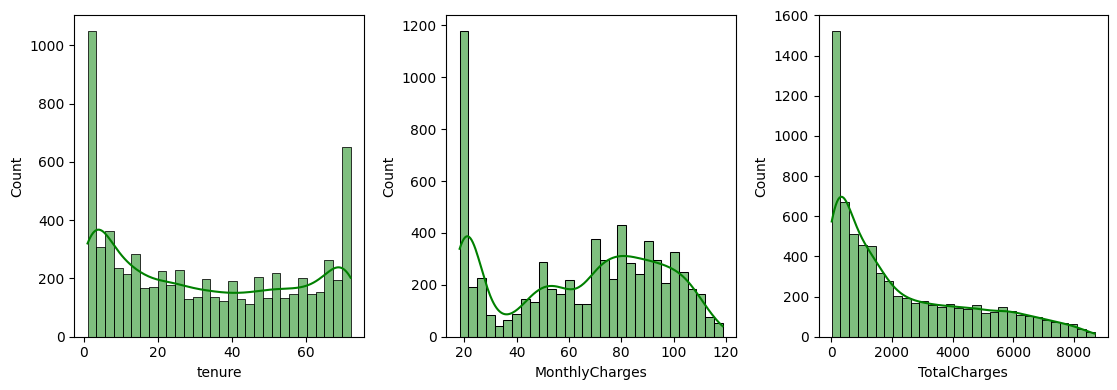

In [ ]:
#Histogram untuk variabel numerik
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30)
    plt.tight_layout()

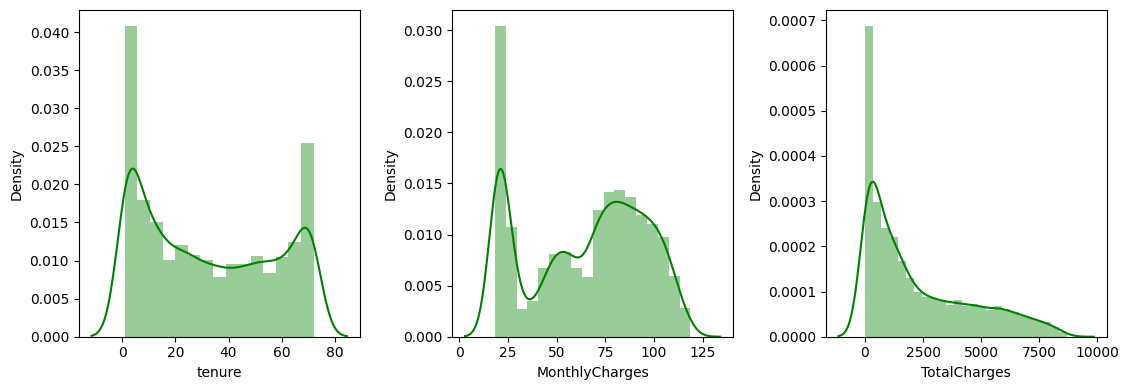

In [ ]:
#Distplot untuk variabel numerik
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

Yang perlu diperhatikan:
- Bagaimana bentuk distribusi setiap kolom? Apakah normal? Positive skewed? Negative skewed? Bimodal?
- Apakah ada nilai-nilai tertentu yang umum? Lonjakan pada distribution plot mungkin menmiliki makna tertentu

Berdasarkan histogram terlihat bahwa untuk variabel tenure dan MonthlyCharges data berdistribusi bimodal karena terdapat jumlah atau frekuensi yang besar di dua titik. Sedangkan pada variabel TotalCharges terlihat bahwa distribusinya miring kanan (right skewed) dikarenakan nilai mean > median > modus.

### Countplot (categorical)

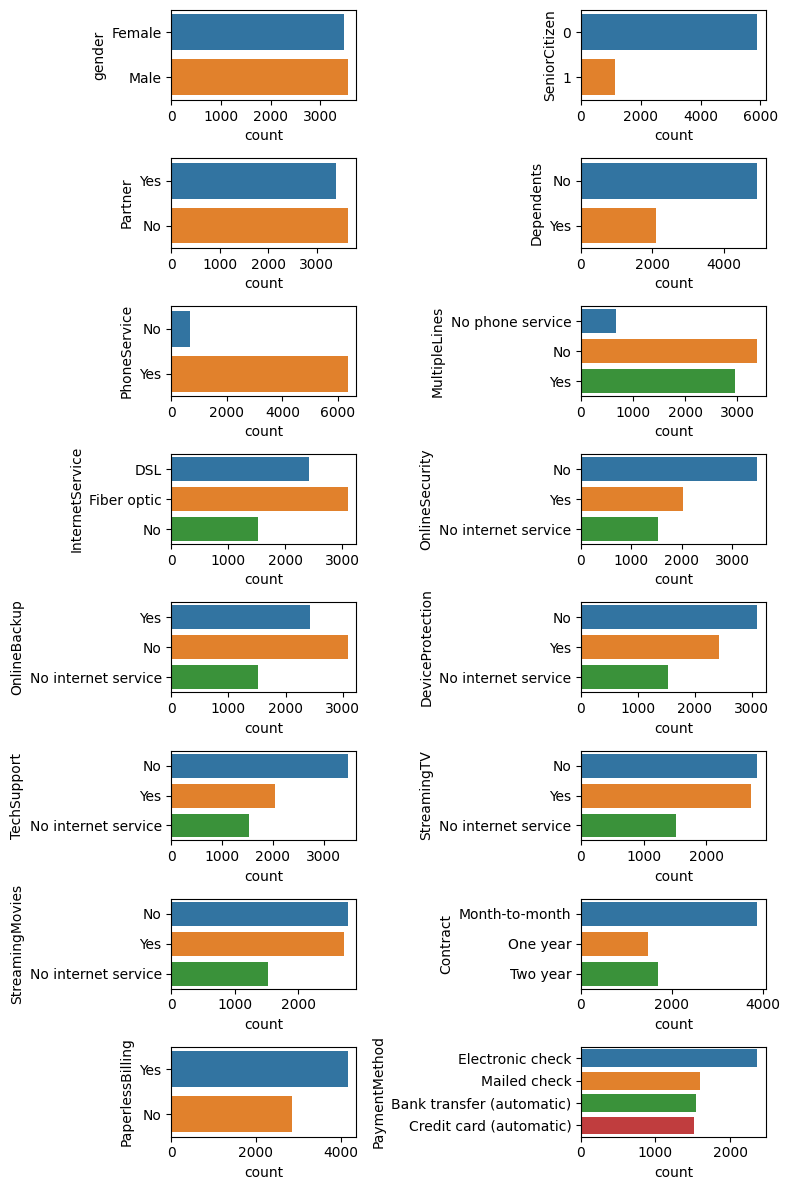

In [ ]:
#Melihat distribusi variabel kategorik
plt.figure(figsize=(8, 12))
for i in range(0, len(cats)):
    plt.subplot(8, 2, i+1)
    sns.countplot(y = df[cats[i]], orient='v')
    plt.tight_layout()

Yang perlu diperhatikan:
- Ketimpangan antar kategori, terutama pada target Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

Berdasarkan output terlihat bahwa pada variabel SeniorCitizen, PhoneService, Dependents, dan Contract terdapat ketimpangan sebaran kategori yang dapat mengakibatkan proses learning gagal.

## Multivariate Analysis

Multivariate Analysis adalah teknik statistik yang digunakan untuk menganalisis hubungan antara dua atau lebih variabel dalam satu set data. Tujuan dari analisis multivariat adalah untuk menemukan pola, tren, dan hubungan antara variabel-variabel dalam dataset. Analisis multivariat dapat digunakan untuk membangun model prediksi, mengidentifikasi faktor-faktor yang mempengaruhi variabel tertentu, dan memahami struktur kompleks dalam data.

### Correlation heatmap

Correlation heatmap adalah representasi grafis dari matriks korelasi, yang menunjukkan kekuatan dan arah hubungan linier antara dua atau lebih variabel. Heatmap sering digunakan untuk mengeksplorasi hubungan antara beberapa variabel sekaligus.

Pada correlation heatmap, setiap variabel direpresentasikan oleh sebuah kotak berwarna, dan warna tersebut mewakili kekuatan korelasi antara variabel tersebut dan semua variabel lain dalam dataset. Skala warna berkisar dari warna terang, yang mewakili korelasi rendah, hingga warna gelap, yang mewakili korelasi tinggi.

<Axes: >

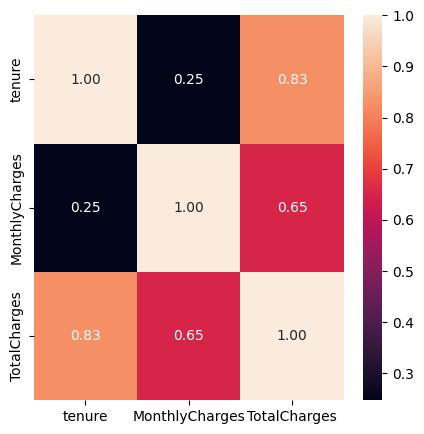

In [ ]:
#Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Berdasarkan output di atas, variabel tenure, MonthlyCharges dan TotalCharges saling berkorelasi positif. Artinya, kenaikan nilai pada suatu variabel akan membuat variabel lain mengalami kenaikan juga.

In [ ]:
#encoding variabel categorical
df2 = pd.get_dummies(df, drop_first = True)
df2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


<Axes: >

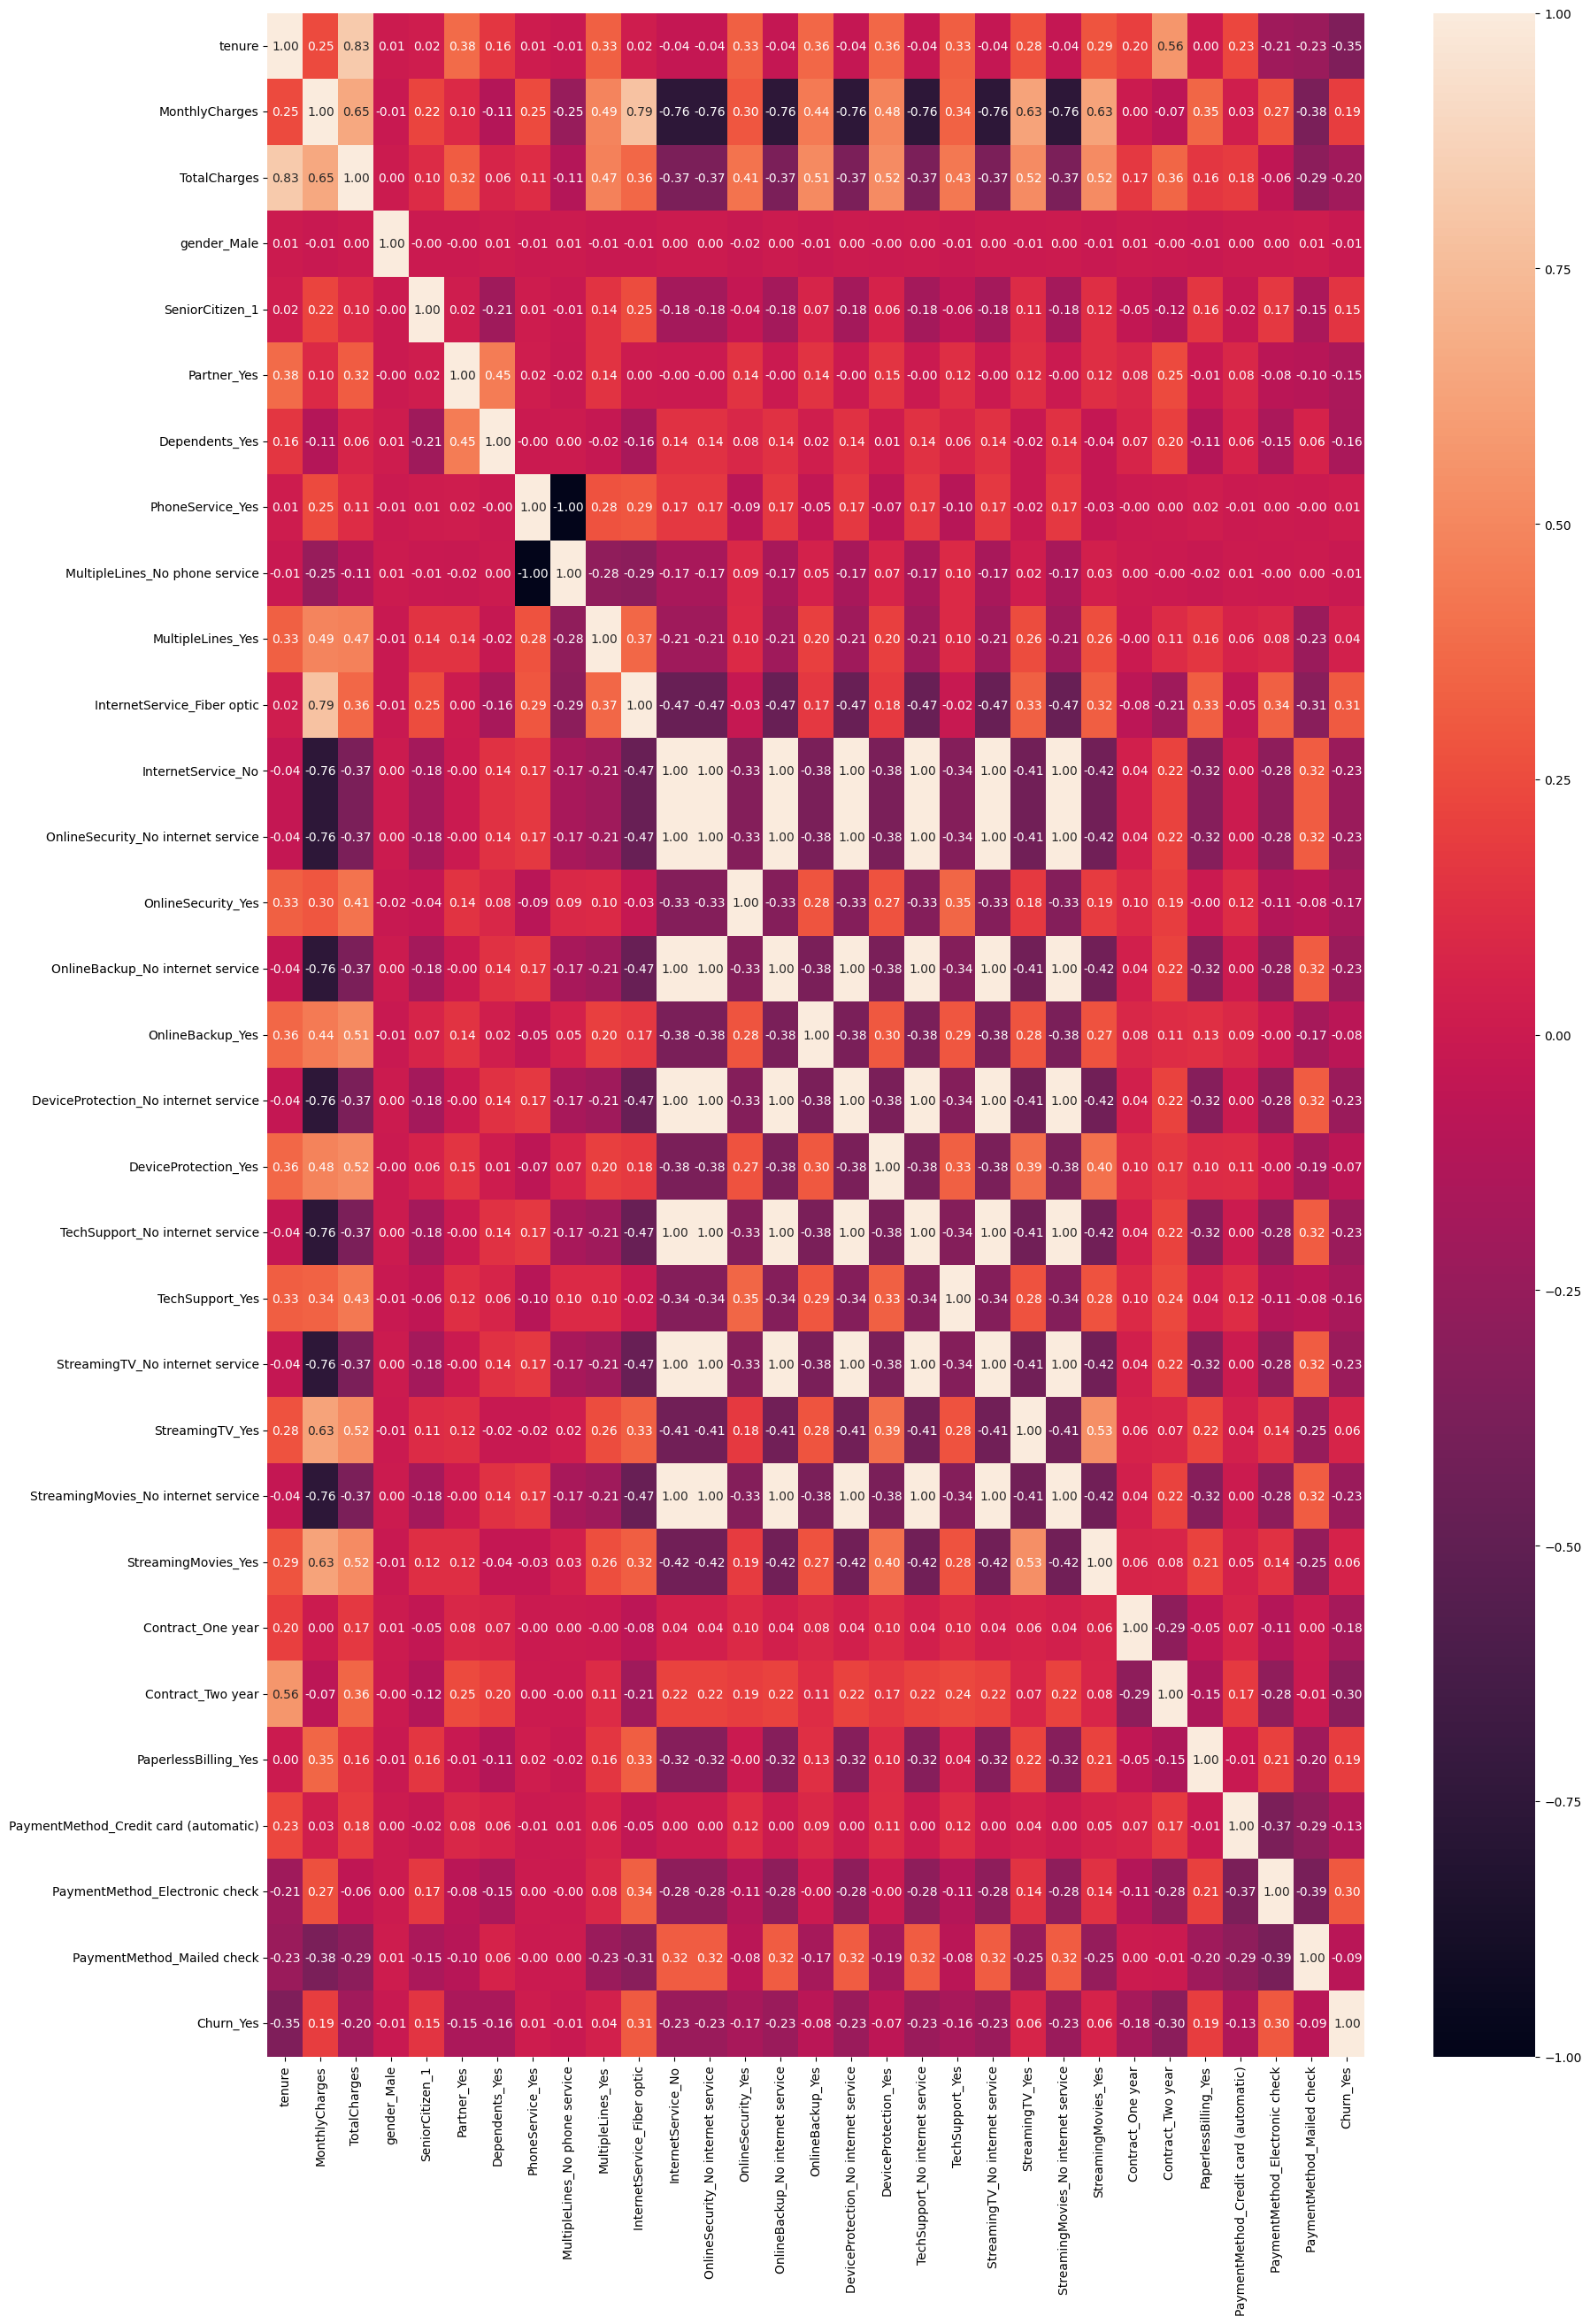

In [ ]:
plt.figure(figsize = (20, 30))
sns.heatmap(df2.corr(), annot = True, fmt=".2f")

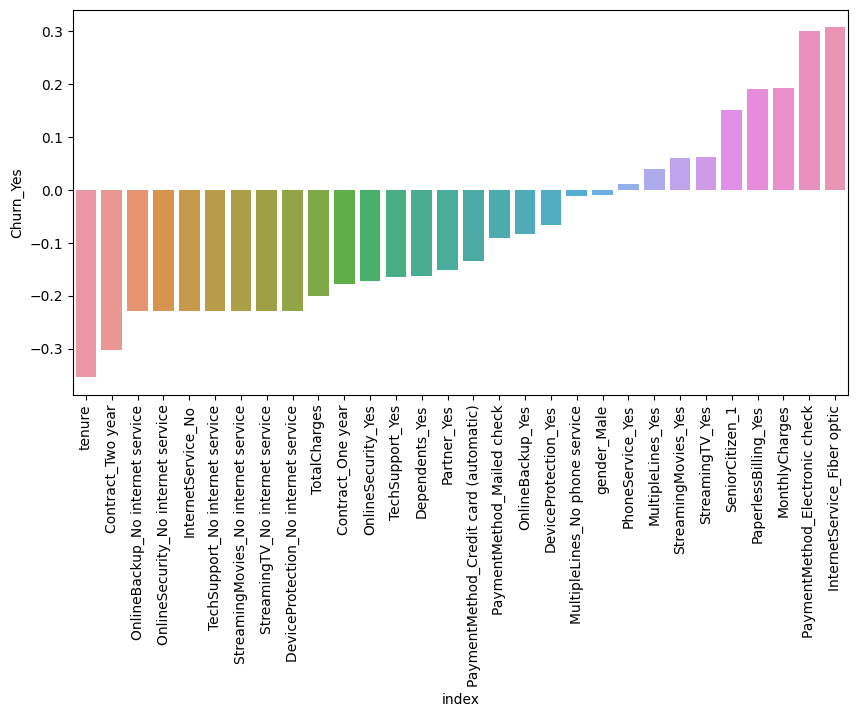

In [ ]:
#drop Churn_Yes
df3=df2.corr()['Churn_Yes'].sort_values().reset_index()
df3=df3[~df3['index'].str.contains('Churn_Yes')]

#membuat barplot untuk melihat korelasi feature terhadap target
plt.figure(figsize = (10, 5))
chart = sns.barplot(data=df3,x="index",y="Churn_Yes")

for item in chart.get_xticklabels():
  item.set_rotation(90)

Berdasarkan output di atas, diketahui bahwa atribut 'InternetService_Fiber optic' dan 'PaymentMethod_Electronic check' berkorelasi positif sedang terhadap variabel target yaitu 'Churn_Yes' dengan nilai korelasi 0,3. Sedangkan pada atribut 'tenure' dan 'Contract_Two year' memiliki korelasi negatif sedang terhadap variabel target dengan nilai korelasi sebesar -0,35 sampai -0,3. Oleh karena itu, atribut tersebut memiliki pengaruh terhadap kinerja model dalam pemodelan machine learning terutama untuk kasus klasifikasi dan prediksi.

Yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target? Bila tidak, maka model linear tidak dapat digunakan
- Apakah ada 2 feature yang berkorelasi kuat (>0.9)? Bila ya, ada kemungkinan besar kedua feature tersebut redundan

Summary:
1. Ada beberapa feature yang berkorelasi positif dengan target yaitu atribut PhoneService_Yes, MultipleLines_Yes, StreamingMovies_yes, StreamingTV_Yes, SeniorCitizen_1, PaperlessBilling_Yes, Monthlycharges, PaymentMethod_Electronic check, dan InternetService_Fiber optic.
2. Berdasarkan heatmap, terlihat bahwa terdapat beberapa feature yang berkorelasi sempurna yaitu bernilai 1,00


### Category Plot

In [ ]:
df_new = df[['tenure', 'MonthlyCharges','TotalCharges','Churn']]

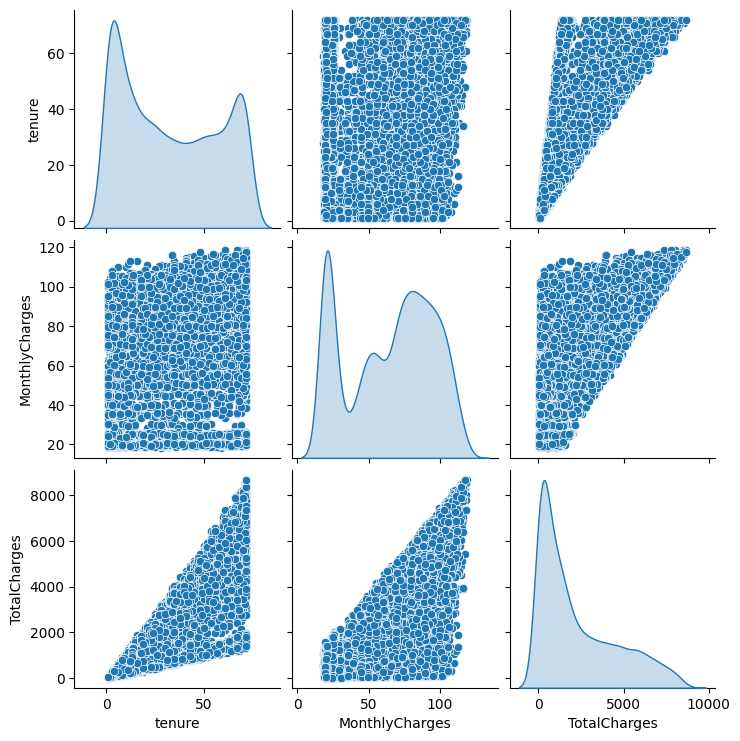

In [ ]:
sns.pairplot(df_nums, diag_kind = 'kde')

**Apakah ada scatter plot yang menunjukkan cluster yang
cukup jelas? Pola pada scatter plot bisa menjadi petunjuk untuk membuat feature baru**

Summary:

Berdasarkan output di atas, terlihat bahwa plotnya berpola positive linear association dan belum ada scatterplot yang menunjukkan cluster yang jelas.

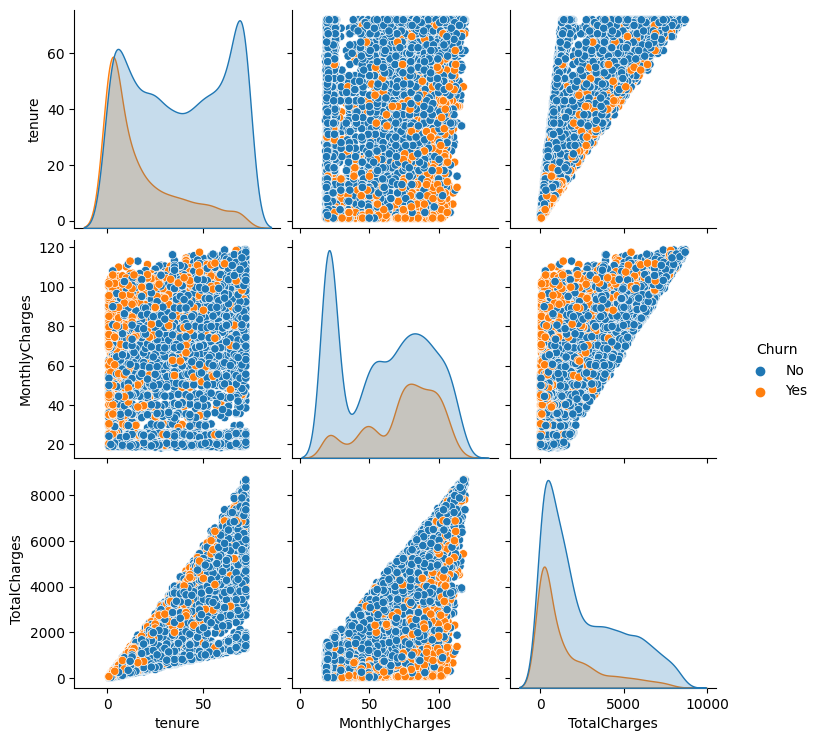

In [ ]:
sns.pairplot(df_new, diag_kind = 'kde', hue = 'Churn')

Berdasarkan output di atas, terlihat bahwa target Churn_Yes dan Churn_No cukup terpisah pada korelasi MothlyCharges terhadap tenure dan TotalCharges. Artinya terdapat korelasi yang kuat antara target dengan variabel lainnya.

Yang perlu diperhatikan:
- Apakah ada scatter plot dimana kedua warna terpisah dengan baik? Scatter plot dimana target terpisah dapat menjadi indikasi kombinasi fitur yang baik

Summary:

Berdasarkan output di atas, dapat dilihat bahwa terdapat pola pengelompokan pada plot yang menunjukkan pelanggan yang Churn_Yes meskipun mereka tidak sepenuhnya terpisah dari grup Churn_No lainnya. Artinya data tersebut cukup baik untuk dianalisis dengan harapan akurasi machine learning yang baik.